In [1]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import uniform
import scipy.stats as sc
import matplotlib.pyplot as plt

# Statistics of Poisson Distribution

Input Parameters: $\lambda$ and number of particles: n_particles 

In [2]:
lambda0 = 0.6
pois = poisson(lambda0)

Calculate the first four moments:

In [3]:
mean, var = pois.stats(moments='mv')
print('mean = %s, variance = %s' % (mean,var) )

mean = 0.6, variance = 0.6


#cdf : Cumulative distribution function. ppf : Percent point function - inverse of cdf

cdf gives the probability that a distribution X will take values less than or equal to x : cdf(x) = P(X<= x) \
ppf gives the upper bound x below which the distribution X will have the probability P : ppf(P) = x such that cdf(x) = P(X<=x)

In [4]:
print('At x = 2, cdf = ' + str(np.round(pois.cdf(2),2)))
print('At P = %s ppf = %s' % (np.round(pois.cdf(2),2),pois.ppf(0.97)))

At x = 2, cdf = 0.98
At P = 0.98 ppf = 2.0


pmf: probability mass function, or it is also called probability distribution function \
In the case of Posisson distribution, 'k' is the occurances and the probability P is given as a function of both k and $\lambda$ as \
                $P(k;\lambda) = \frac{\Lambda^{k}}{k!}e^{-k}$

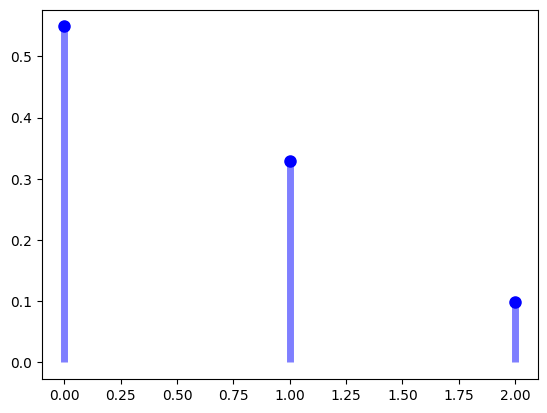

In [5]:
k = np.arange(pois.ppf(0.01),
              pois.ppf(0.99))

fig, ax = plt.subplots(1, 1)
ax.plot(k, pois.pmf(k), 'bo', ms=8, label='poisson pmf')
ax.vlines(k, 0, pois.pmf(k), colors='b', lw=5, alpha=0.5)

# Generate Random numbers

X is the set of instances of size (1, n_particles) made from the poisson distribution with a lambda defined in 1st cell here (same as done in cell 1).

(array([1.66000000e-01, 1.85666667e-01, 1.90333333e-01, 1.37250000e-01,
        8.34166667e-02, 6.16666667e-02, 7.00000000e-03, 1.50000000e-03,
        4.16666667e-04, 8.33333333e-05]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

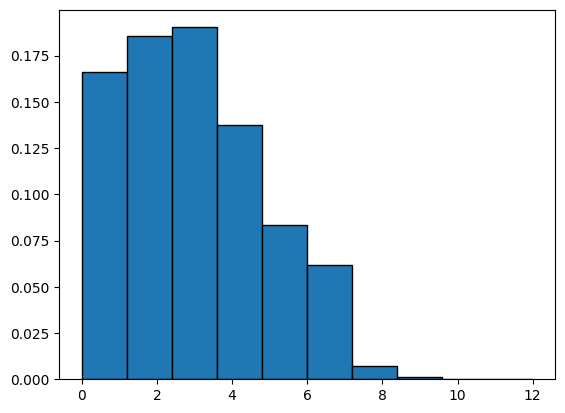

In [13]:
lambda0 = 3
n_particles = 10000

pois = poisson(lambda0)
X = pois.rvs(size = n_particles)

plt.hist(X, density=True, edgecolor='black')

Lock the seed to obtain the same set of number eveyrtime using 'random_state' attribute.

(array([1.68333333e-01, 1.84250000e-01, 1.85250000e-01, 1.44166667e-01,
        8.15000000e-02, 5.97500000e-02, 7.33333333e-03, 2.00000000e-03,
        5.83333333e-04, 1.66666667e-04]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

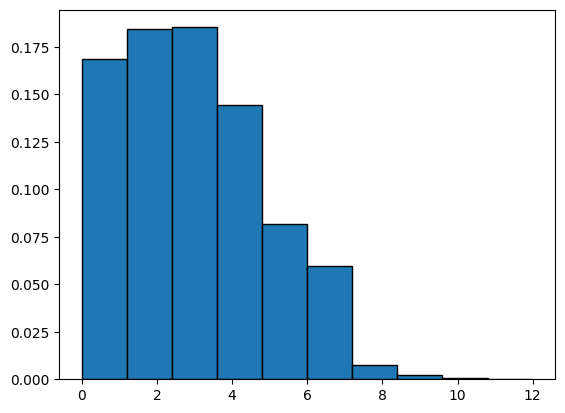

In [19]:
lambda0 = 3
n_particles = 10000

pois = poisson(lambda0)
X = pois.rvs(size = n_particles, random_state=100)

plt.hist(X, density=True, edgecolor='black')

# Generate Random distribution within a rectangular Boundary

Consider a rectangle of size $[0,W] \times [0,H]$, then the area of this rectangle is $A = W*h$ making the mean of the random homogeneous poisson distribution to be $\Lambda = \lambda*A$

### making the simulation Domain

In [2]:
#Simulation window parameters
xmin=0
xmax=200
ymin=0
ymax=200
W=xmax-xmin;H=ymax-ymin; #rectangle dimensions
Area=W*H

print("Area = %s" %Area)


Area = 40000


length of X is 90000


(0.0, 200.0)

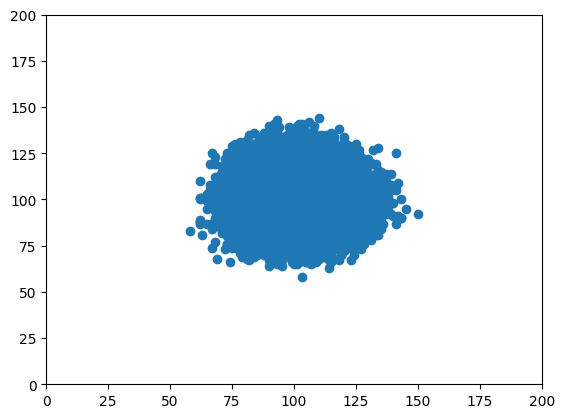

In [3]:
n_particles = 90000

poisx = poisson(W/2)
poisy = poisson(H/2)
X = poisx.rvs(size = n_particles, random_state=200)
Y = poisy.rvs(size = n_particles, random_state=100)

print("length of X is %s" % len(X))
plt.scatter(X,Y)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])


# Structure Factor calculation

Structure factor is a Fourier quantity that quantifies the extend of periodic nature a certain distribution holds. \
structure factors S is given as a function of the wave vector for N particle system is: $$S(\mathbf{q}) = \frac{1}{N}\left|\sum_{j = 1}^{N} e^{-\mathrm{i}\mathbf{q.r_j}}\right|^2$$

In [5]:
def structure_factor(x,y,kx,ky):
    no_particle = len(x)*len(y)
    


    Kx, Ky,x_pos = np.meshgrid(kx,ky,x)
    Kx, Ky,y_pos = np.meshgrid(kx,ky,y)

    Argument = Kx*x_pos + Ky*y_pos


    print(np.shape(Argument))

    cosQ = np.sum(np.cos(Argument), axis = 2)
    sinQ = np.sum(np.sin(Argument), axis = 2)

    S = (cosQ**2 + sinQ**2)/no_particle
   
    return S

Calculating the struvture factor for the above exmaple

In [13]:
n_particles = 1000

poisx = poisson(W/2)
poisy = poisson(H/2)
X = poisx.rvs(size = n_particles, random_state=200)
Y = poisy.rvs(size = n_particles, random_state=100)

kx = np.linspace(-1,1,num=500) #np.linspace(-2*np.pi/max(x),2*np.pi/max(x),num = len(x), endpoint=True)
ky = np.linspace(-1,1,num=500) #np.linspace(-2*np.pi/max(y),2*np.pi/max(y),num = len(x), endpoint=True)

S_test = structure_factor(X,Y,kx,ky)

(500, 500, 1000)


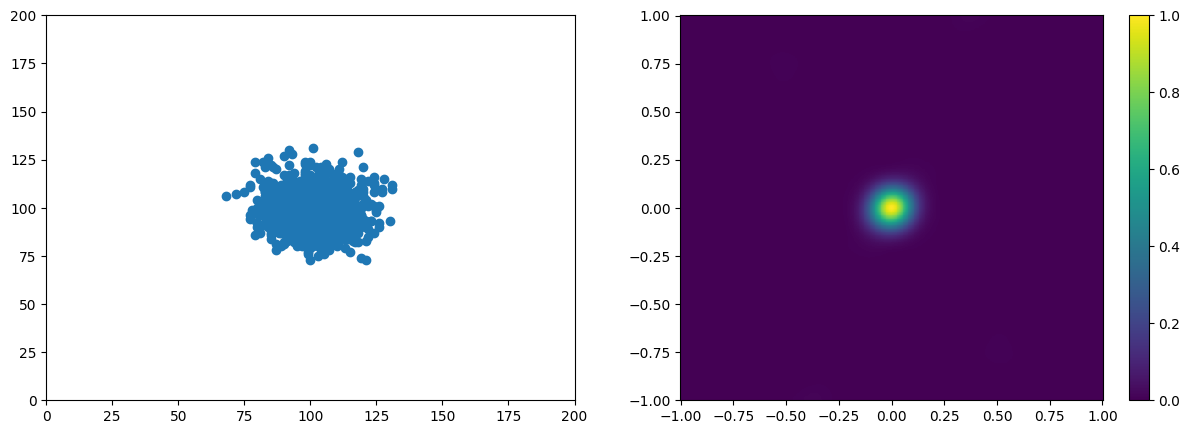

In [14]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X,Y)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.subplot(1,2,2)
plt.pcolormesh(kx,ky,S_test, cmap = 'viridis', vmin=0, vmax=1) 
plt.colorbar(location="right")
